# <center>911 Calls Project</center>

In [1]:
# importing numpy & pandas
import numpy as np
import pandas as pd

In [2]:
# Importing visualization libraries and setting %matplotlib inline. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the csv file as a dataframe
df = pd.read_csv('911.csv')

In [4]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
# getting the top 5 rows
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
# top 5 zipcodes for 911 calls
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
# top 5 townships (twp) for 911 calls
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
# no of unique title codes
df['title'].nunique()

110

In [9]:
# Creating new feature

# In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic
# creating a new column called 'Reason'
df['Reason'] = df['title'].apply(lambda title:title.split(':')[0])

In [10]:
# the most common Reason for a 911
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

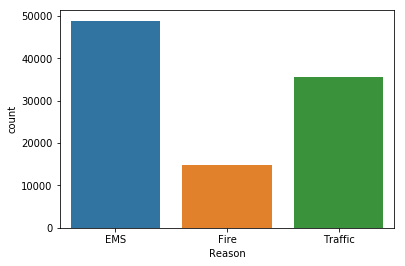

In [11]:
# Using seaborn to create a countplot of 911 calls by Reason
sns.countplot(x='Reason', data=df)

In [12]:
# data type of the objects in the timeStamp column
type(df['timeStamp'].iloc[0])

str

In [13]:
# converting timestamp to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
# creating 3 new columns called Hour, Month, and Day of Week
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['month'] = df['timeStamp'].apply(lambda time:time.month)
df['day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [15]:
# a dictionary to map day of week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
# mapping day of week
df['day of week'] = df['day of week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


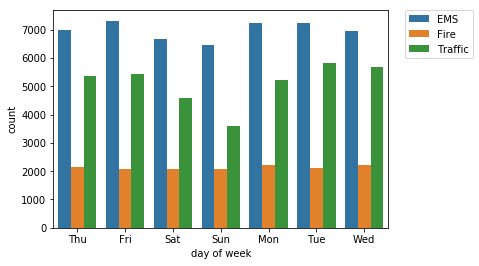

In [17]:
# using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot(x='day of week', data=df, hue='Reason')
# to relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

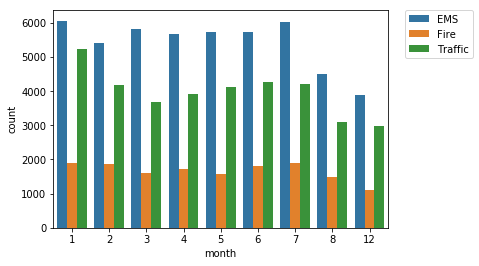

In [18]:
# use seaborn to create a countplot of the month column with the hue based off of the Reason column
sns.countplot(x='month', data=df, hue='Reason')
# to relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Findings-
**Some months are missing**

In [19]:
# grouping the dataframe by the month
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

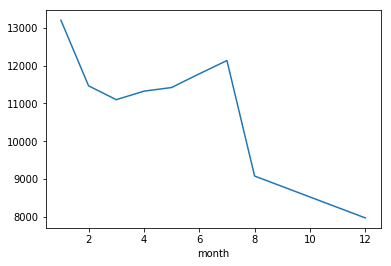

In [20]:
# creating a simple plot off of the dataframe indicating the count of calls per month
byMonth['lat'].plot()

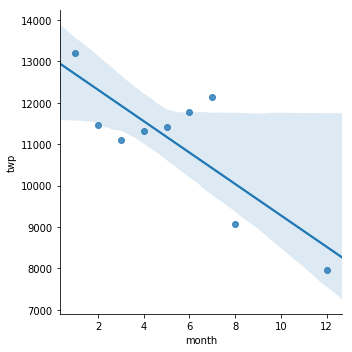

In [21]:
# creating a linear fit on the number of calls per month
sns.lmplot(x='month', y='twp', data=byMonth.reset_index())

In [22]:
# Creating a new column called 'Date' that contains the date from the timeStamp column
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

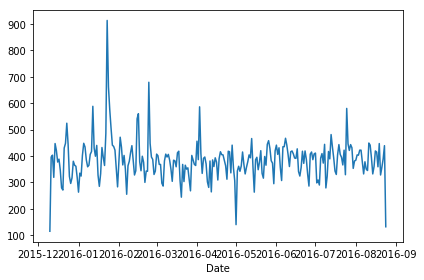

In [23]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

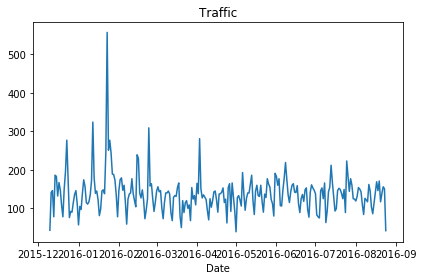

In [24]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

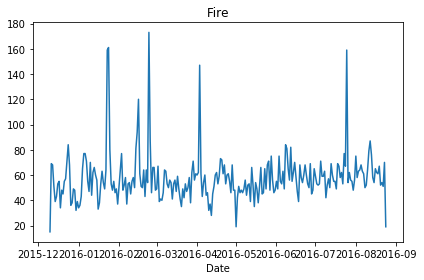

In [25]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

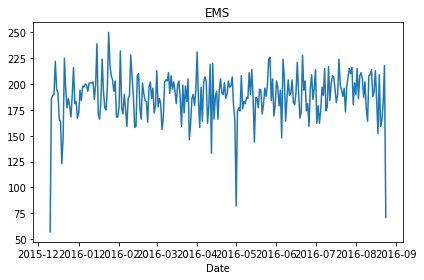

In [26]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [27]:
dayHour = df.groupby(by=['day of week', 'hour']).count()['Reason'].unstack()

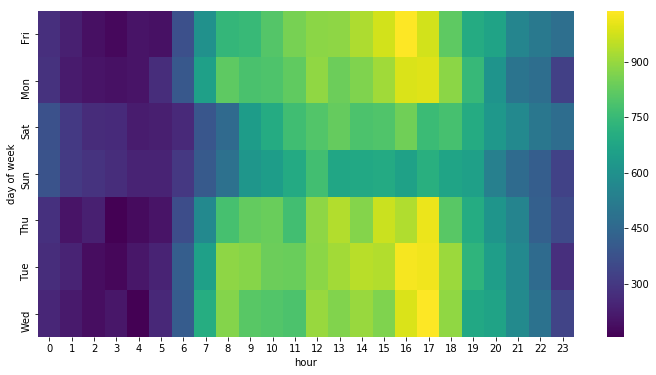

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

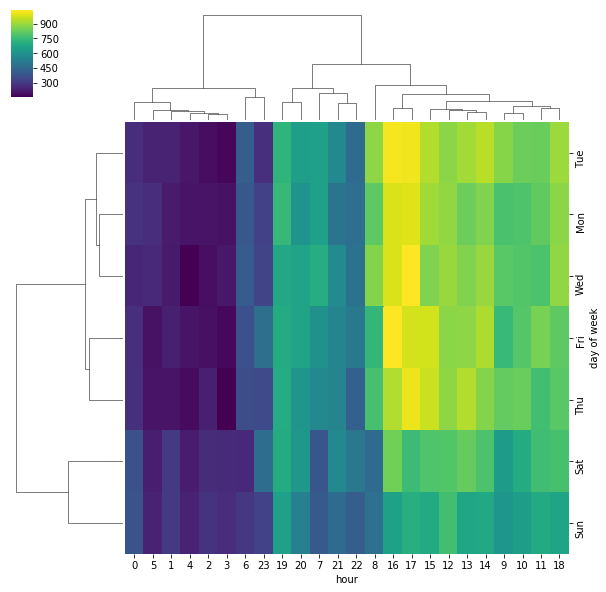

In [29]:
# creating a clustermap using this DataFrame
sns.clustermap(dayHour, cmap='viridis')

In [30]:
dayMonth = df.groupby(by=['day of week', 'month']).count()['Reason'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


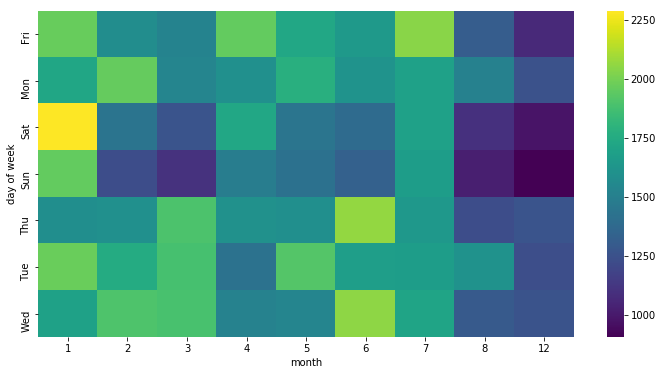

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

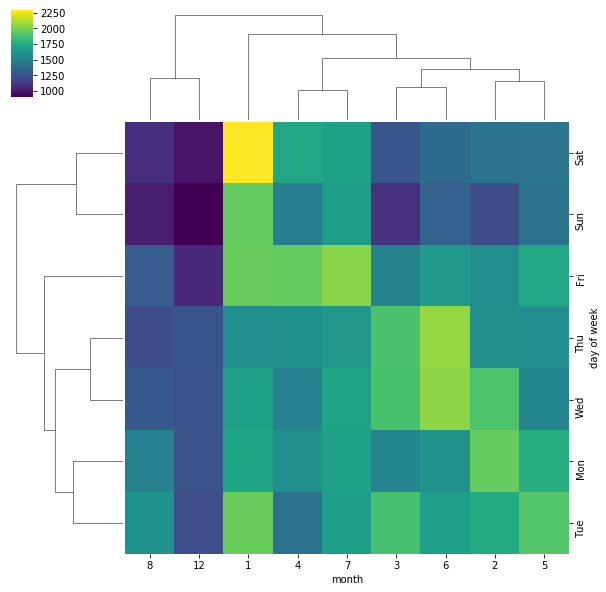

In [32]:
sns.clustermap(dayMonth, cmap='viridis')